In [78]:
import warnings
warnings.filterwarnings(action='ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
plt.rc('font', family='NanumBarunGothic')
plt.rc('axes', unicode_minus=False)

In [80]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [81]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/vgames2.csv')
df.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16327 non-null  float64
 4   Genre        16548 non-null  object 
 5   Publisher    16540 non-null  object 
 6   NA_Sales     16598 non-null  object 
 7   EU_Sales     16598 non-null  object 
 8   JP_Sales     16598 non-null  object 
 9   Other_Sales  16598 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB


In [84]:
df.isnull().sum()

Unnamed: 0       0
Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [85]:
#결측치가 제대로 삭제되었음을 확인
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16241 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16241 non-null  int64  
 1   Name         16241 non-null  object 
 2   Platform     16241 non-null  object 
 3   Year         16241 non-null  float64
 4   Genre        16241 non-null  object 
 5   Publisher    16241 non-null  object 
 6   NA_Sales     16241 non-null  object 
 7   EU_Sales     16241 non-null  object 
 8   JP_Sales     16241 non-null  object 
 9   Other_Sales  16241 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.4+ MB


In [86]:
df.duplicated().sum()

0

In [87]:
#Sales 관련 단위 통일 (K와 M으로 서로다른 단위가 혼재하고 있는 상황)

def conversion(x):
  if 'K' in x:
    x=x.replace('K','')
    return float(x)*0.001
  elif 'M' in x:
    x=x.replace('M','')
    return float(x)
  else:
    return float(x) 

columns_sales = df.filter(regex='_Sales').columns

for a in columns_sales:
  df[a] = df[a].apply(conversion)



In [88]:
#특정 게임의 총 판매량에 해당하는 feature 생성
df['Total_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales']+ df['Other_Sales']

In [89]:
df.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25


In [90]:
#year형태가 여러가지로 다름
df['Year'].unique()

array([2.008e+03, 2.009e+03, 2.010e+03, 2.005e+03, 2.011e+03, 2.007e+03,
       2.001e+03, 2.003e+03, 2.006e+03, 2.014e+03, 2.015e+03, 2.002e+03,
       1.997e+03, 2.013e+03, 1.996e+03, 2.004e+03, 2.000e+03, 1.984e+03,
       1.998e+03, 2.016e+03, 1.985e+03, 1.999e+03, 9.000e+00, 9.700e+01,
       1.995e+03, 1.993e+03, 2.012e+03, 1.987e+03, 1.982e+03, 1.100e+01,
       1.994e+03, 1.990e+03, 1.500e+01, 1.992e+03, 1.991e+03, 1.983e+03,
       1.988e+03, 1.981e+03, 3.000e+00, 1.989e+03, 9.600e+01, 6.000e+00,
       8.000e+00, 1.986e+03, 1.000e+00, 5.000e+00, 4.000e+00, 1.000e+01,
       9.800e+01, 7.000e+00, 1.600e+01, 8.600e+01, 1.400e+01, 9.500e+01,
       2.017e+03, 1.980e+03, 2.020e+03, 2.000e+00, 1.300e+01, 0.000e+00,
       1.200e+01, 9.400e+01])

In [91]:
def year(x):
  if (x >= 0) & (x < 20):
    return int(2000 + x)
  elif (x > 30) & (x < 1000):
    return int(1900 + x)
  else:
    return int(x)

df['Year'] = df['Year'].apply(year)
df.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,1,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,2,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,4,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25


# **Q1. 지역에 따라서 선호하는 게임 장르가 다를까?**

In [92]:
na_genre = df.groupby(by=['Genre'])['NA_Sales'].sum() # NA
na_genre = na_genre.reset_index()

eu_genre = df.groupby(by=['Genre'])['EU_Sales'].sum() # EU
eu_genre = eu_genre.reset_index()

jp_genre = df.groupby(by=['Genre'])['JP_Sales'].sum() # JP
jp_genre = jp_genre.reset_index()

ot_genre = df.groupby(by=['Genre'])['Other_Sales'].sum() # Other
ot_genre = ot_genre.reset_index()

tt_genre = df.groupby(by=['Genre'])['Total_Sales'].sum() # Total
tt_genre = tt_genre.reset_index()

tt_genre = tt_genre.combine_first(na_genre).combine_first(eu_genre).combine_first(jp_genre).combine_first(ot_genre)
tt_genre = tt_genre.set_index("Genre")

tt_genre

,EU_Sales,JP_Sales,NA_Sales,Other_Sales,Total_Sales
Genre,,,,,
Action,513.64,156.60,858.75,183.99,1712.98
Adventure,63.66,51.87,101.79,16.70,234.02
Fighting,99.90,87.14,220.35,36.15,443.54
Misc,208.15,104.18,394.73,72.64,779.70
Platform,200.63,130.53,445.38,51.45,827.99
Puzzle,50.47,56.24,121.58,12.44,240.73
Racing,235.02,56.32,354.70,76.51,722.55
Role-Playing,183.09,342.93,318.76,56.73,901.51
Shooter,310.23,38.18,574.48,101.86,1024.75


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


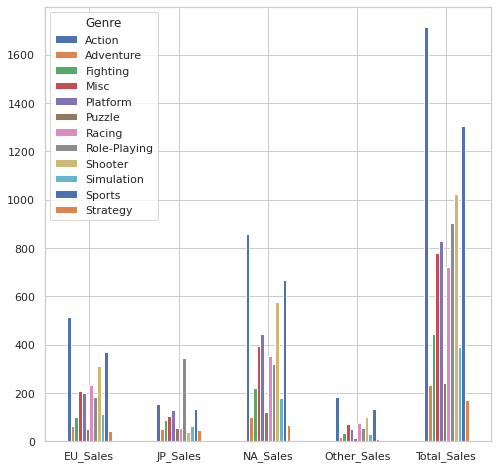

In [93]:
tt_genre.T.plot.bar(rot=0, figsize = (8,8))

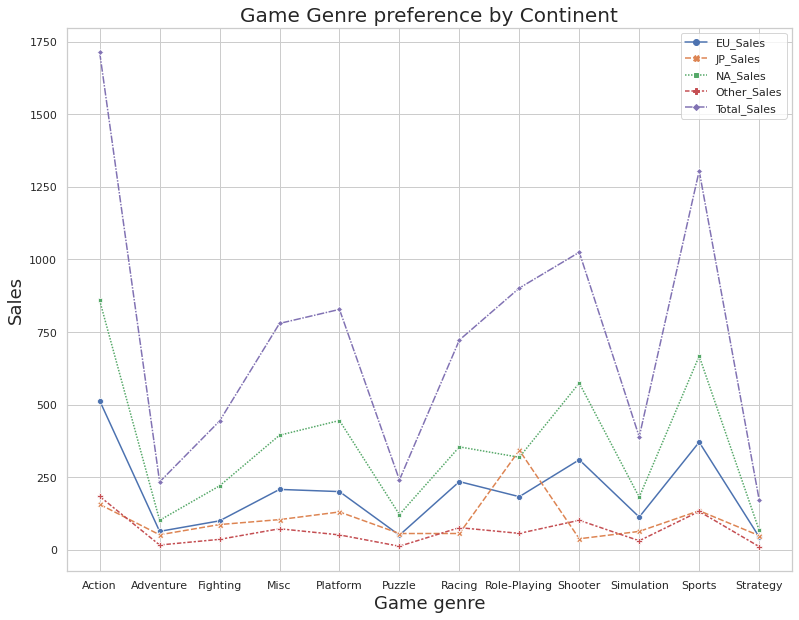

In [95]:
sns.set(style='whitegrid')
plt.figure(figsize=(13, 10))
plt.title("Game Genre preference by Continent", fontsize=20)
plt.xlabel("Game genre", fontsize=18)
plt.ylabel("Sales", fontsize=18)
sns.lineplot(data=tt_genre, markers=True);

지역에 따라서 **선호하는 게임 장르가 일부 다름**을 확인할 수 있다. **북미, 유럽, 기타 지역**에서는 **Action 장르**가 가장 선호, **Sports**가 두번째로 선호되었던 반면 **일본 지역**에서는 **Role-Playing**이 가장 선호, **Action**이 두번째로 선호되는 것으로 확인 가능하다. 

# **Q2.연도별 게임의 트렌드가 있을까?**

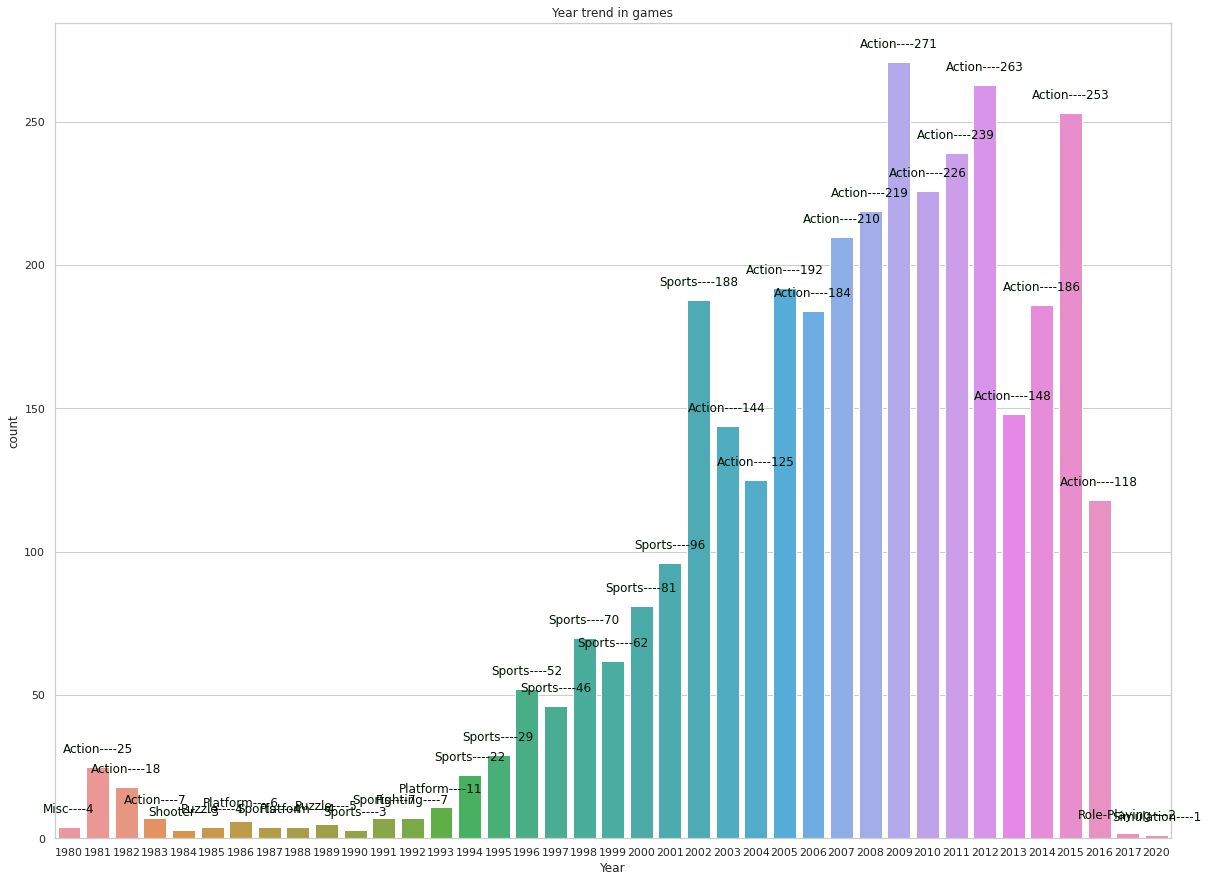

In [96]:
#일부 reference; Kaggle AHMED MAHER22
year_max_df = df.groupby(['Year', 'Genre']).size().reset_index(name='count')
year_max_idx = year_max_df.groupby(['Year'])['count'].transform(max) == year_max_df['count']
year_max_genre = year_max_df[year_max_idx].reset_index(drop=True)
year_max_genre = year_max_genre.drop_duplicates(subset=["Year", "count"], keep='last').reset_index(drop=True)
genre = year_max_genre['Genre'].values

plt.figure(figsize=(20, 15))
g = sns.barplot(x='Year', y='count', data=year_max_genre)
index = 0
for value in year_max_genre['count'].values:
    g.text(index, value + 5, str(genre[index] + '----' +str(value)), color='#010', size=12, ha="center")
    index += 1
plt.xticks()
plt.title('Year trend in games', loc='center')
plt.show()

최근 시점에 해당하는 17,20년에는 게임 출시량 자체가 적어 논외로 하고, 그 외 2003년부터 2016년까지 약 14년간 **"Action" 장르**가 가장 globally 많이 출시되는 게임 장르임을 확인 할 수 있다. 즉 **일종의 연도에 따른 트렌드가 존재**하는 것이다. 

# **Q3.출고량이 높은 게임에 대한 분석 및 시각화 프로세스**

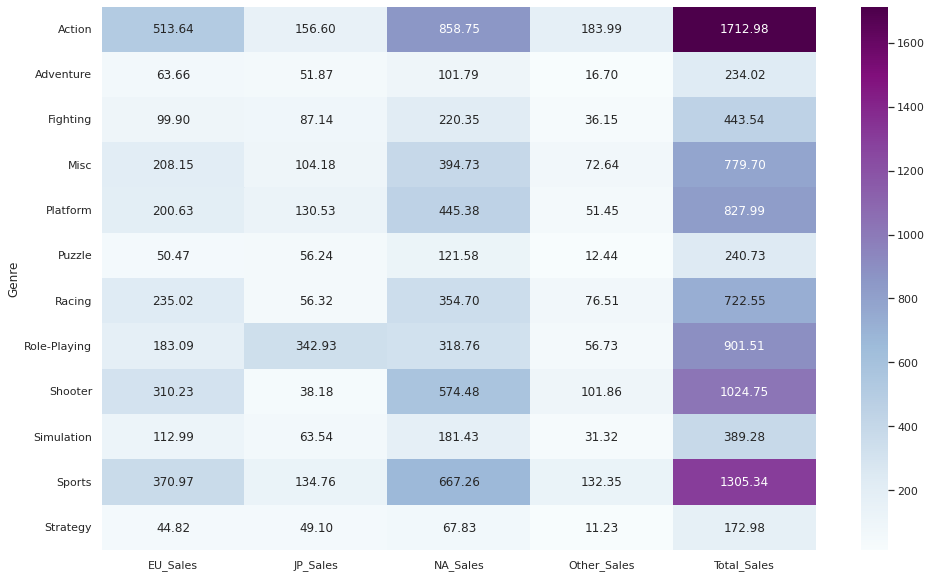

In [97]:
plt.figure(figsize=(16,10))
sns.heatmap(tt_genre, annot=True, fmt = ".2f", cmap = "BuPu")

In [99]:
#top-15 games globally

top15 = df.nlargest(15, ['Total_Sales'])
top15

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
2908,2909,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
4199,4200,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
12579,12580,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3352,3353,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
7829,7830,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
1203,1204,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6937,6938,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
3014,3015,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01
16531,16532,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61
10488,10489,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [107]:
top15['Platform'].value_counts()

Wii    7
DS     3
GB     3
NES    2
Name: Platform, dtype: int64

In [101]:
top15['Genre'].value_counts()

Sports          4
Platform        3
Racing          2
Role-Playing    2
Shooter         1
Puzzle          1
Simulation      1
Misc            1
Name: Genre, dtype: int64

In [102]:
pf_genre = df.groupby(['Genre'], as_index=False)['Total_Sales'].sum()
pf_genre = pf_genre.sort_values(['Total_Sales'], ascending=False).reset_index()
pf_genre

,index,Genre,Total_Sales
0,0,Action,1712.98
1,10,Sports,1305.34
2,8,Shooter,1024.75
3,7,Role-Playing,901.51
4,4,Platform,827.99
5,3,Misc,779.70
6,6,Racing,722.55
7,2,Fighting,443.54
8,9,Simulation,389.28
9,5,Puzzle,240.73


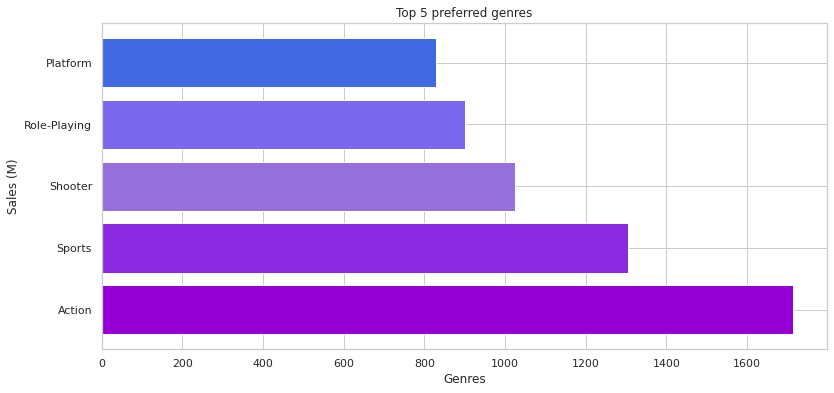

In [105]:
e = pf_genre['Genre'][:5]
f = pf_genre['Total_Sales'][:5]

plt.figure(figsize=[13, 6])
plt.title('Top 5 preferred genres')
plt.xlabel('Genres')
plt.ylabel('Sales (M)')
plt.barh(e, f, color=['darkviolet', 'blueviolet', 'mediumpurple', 'mediumslateblue', 'royalblue'])
plt.show()

In [108]:
pf_plat = df.groupby(['Platform'], as_index=False)['Total_Sales'].sum()
pf_plat = pf_plat.sort_values(['Total_Sales'], ascending=False).reset_index()
pf_plat

,index,Platform,Total_Sales
0,16,PS2,1222.44
1,28,X360,968.59
2,17,PS3,946.74
3,26,Wii,900.15
4,4,DS,817.19
5,15,PS,725.16
6,6,GBA,304.76
7,19,PSP,290.84
8,18,PS4,275.78
9,5,GB,254.43


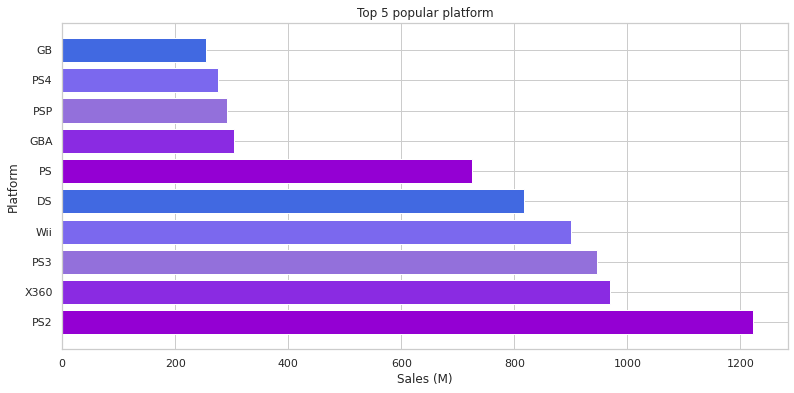

In [111]:
q = pf_plat['Platform'][:10]
w = pf_plat['Total_Sales'][:10]

plt.figure(figsize=[13, 6])
plt.title('Top 5 popular platform')
plt.xlabel('Sales (M)')
plt.ylabel('Platform')
plt.barh(q, w, color=['darkviolet', 'blueviolet', 'mediumpurple', 'mediumslateblue', 'royalblue'])
plt.show()

**Action 및 Sports 장르**가 세계적으로 타 장르에 비해 유의미하게 선호 되며, platform의 경우 1위에 해당하는 PS2를 제외하고는 판매량이 크게 차이가 나지 않으므로 **여러 platform을 targeting**할 필요성이 있음이 확인된다. 

따라서 다음 분기 게임 설계시에 **Action, Sports 장르**의 게임을 **top10-15 platform**을 통해 발매하는 것이 수익성 측면에서 가장 타당하다는 결론이 도출된다. 